In [1]:
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp
import sympy as sy
import matplotlib.pyplot as plt
from IPython.display import Image, display




# Dinamika cilindričnog manipulatora

Odabrani manipulator prikazna je na slici ispod te ima odgovarajuće poopćene pomake $q_1$, $q_2$ i $q_3$. Manipulator se sastoji od dvije grede. Jedna greda se rotira oko svoje vertikalne osi za kut $q_1$ dok se druga translatira vertikalno za $q_2$ te horizontalno za poopćeni pomak $q_3$. 

Obje grede imaju svoje mase i momente tromosti, vertikalnu gredu opisuju masa $m_2$ te moment tromosti $I_2$ dok horizontalnoj gredi pripisujemo masu $m_3$ i  moment tromosti $I_3$.

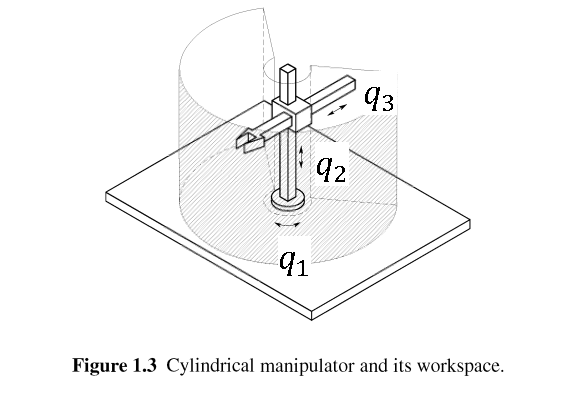

In [2]:
display (Image("manipulato1.png"))

# Simbolički toolbox
Kako se koristi simbolički toolbox potrebno je varijable zadati kao simboličke. Isto tako zadaju se pomaci i vanjske sile kao funkcije u ovisnosti o vremenu što će nam poslužiti u daljnjem proračunu.

Brzine i akceleracije zadane su simboličkim derivacijama također te u ovisnosti o vremenu i poopčenim pomamcima.

In [3]:
# simboličke variable
t, g = sy.symbols(r"t g")
m2, m3= sy.symbols(r"m2 m3")
I2, I3 = sy.symbols(r"I2 I3")

# pomaci
q1, q2, q3 = sy.symbols(r"q_1, q_2, q_3", cls=sy.Function)
q1=q1(t)
q2=q2(t)
q3=q3(t)

#vanjske sile
f1, f2, f3 = sy.symbols(r"f_1, f_2, f_3", cls=sy.Function)
f1=f1(t)
f2=f2(t)
f3=f3(t)

# brzine kao fukcije poopćenih variabli
v1 = sy.diff(q1, t)
v2 = sy.diff(q2, t)
v3 = sy.diff(q3, t)

# akceleracije kao fukcije poopćenih variabli
a1 = sy.diff(v1, t)
a2 = sy.diff(v2, t)
a3 = sy.diff(v3, t)



Sada možemo ispisati simboličke izraze za brzine i akceleracije te uočavamo kako su zadani pomoću poopčenih pomaka što nam je bio i cilj.

In [4]:
q1

q_1(t)

In [5]:
v1

Derivative(q_1(t), t)

In [6]:
a1

Derivative(q_1(t), (t, 2))

# Lagrangeova funkcija
Potrebno je raspisati kinetičke i potencijalne energije pojedinih članova sustava prema seljedećim jednadžbama.

Kinetička energija za translaciju:
$$Ek = \frac{m}{2} * {v}^2$$ 

Kinetička energija za rotaciju:
$$Ek = \frac{J}{2} * {ω}^2$$ 

Potencijalna energija za translaciju:
$$Ep = {m}*{g}*{h}

In [7]:
# kinetička energija
ek = 0.5 * m3 *( (v3 * sy.cos(q1) - v1 * q3 * sy.sin(q1) )**2 + (v3 * sy.sin(q1) + v1 * q3 * sy.cos(q1) )**2 + (v2)**2 ) + 0.5 * (I3 + m3 * q3**2 )*v1**2 + 0.5 * I2 * v1**2

# potencijalna energija
ep = m3 * g * q2

Lagrangeova funkcija za cijeli sustav računa se kao razlika kinetičke i potencijalne energije.

In [8]:
# Lagrangeova funkcija
lgr = ek - ep

Sada možemo ispisati kinetičku i potencijalnu energiju sustava te Lagrangeovu funkciju kao simboličke funkcije.

In [9]:
ek

0.5*I2*Derivative(q_1(t), t)**2 + 0.5*m3*((-q_3(t)*sin(q_1(t))*Derivative(q_1(t), t) + cos(q_1(t))*Derivative(q_3(t), t))**2 + (q_3(t)*cos(q_1(t))*Derivative(q_1(t), t) + sin(q_1(t))*Derivative(q_3(t), t))**2 + Derivative(q_2(t), t)**2) + (0.5*I3 + 0.5*m3*q_3(t)**2)*Derivative(q_1(t), t)**2

In [10]:
ep

g*m3*q_2(t)

In [11]:
lgr

0.5*I2*Derivative(q_1(t), t)**2 - g*m3*q_2(t) + 0.5*m3*((-q_3(t)*sin(q_1(t))*Derivative(q_1(t), t) + cos(q_1(t))*Derivative(q_3(t), t))**2 + (q_3(t)*cos(q_1(t))*Derivative(q_1(t), t) + sin(q_1(t))*Derivative(q_3(t), t))**2 + Derivative(q_2(t), t)**2) + (0.5*I3 + 0.5*m3*q_3(t)**2)*Derivative(q_1(t), t)**2

## Jednadžbe gibanja
Iz Lagrangeove funkcije dobivamo tri jednadžbe gibanja jer sustav ima tri stupnja slobode. Jednadžbe gibanja simbolički su zapisane kao :
$$ \frac{\partial \mathcal{L}}{\partial \mathcal{q_1}}-\frac{d\partial \mathcal{L}}{dt\partial \dot{q_1}}  = -f_{1}(t) \qquad $$

$$\frac{\partial \mathcal{L}}{\partial \mathcal{q_2}}-\frac{d\partial \mathcal{L}}{dt\partial \dot{q_2}} = -f_{2}(t) \qquad $$

$$\frac{\partial \mathcal{L}}{\partial \mathcal{q_3}}-\frac{d\partial \mathcal{L}}{dt\partial \dot{q_3}}  = -f_3(t) \quad\qquad $$


Simboli  $f_1$, $f_2$ i $f_3$ označavaju vanjski moment i sile.

In [12]:
# 1. jednadžba
jed1 = (-sy.diff (lgr, q1) + sy.diff(sy.diff(lgr, v1), t) - f1 ).simplify()


In [13]:
# 2. jednadžba
jed2 = (-sy.diff (lgr, q2) + sy.diff(sy.diff(lgr, v2), t) - f2 ).simplify()



In [14]:
# 3. jednadžba
jed3 = (-sy.diff (lgr, q3) + sy.diff(sy.diff(lgr, v3), t) - f3 )



In [15]:
jed1

1.0*I2*Derivative(q_1(t), (t, 2)) + 1.0*I3*Derivative(q_1(t), (t, 2)) + 2.0*m3*q_3(t)**2*Derivative(q_1(t), (t, 2)) + 4.0*m3*q_3(t)*Derivative(q_1(t), t)*Derivative(q_3(t), t) - 1.0*f_1(t)

# Inverzna kinematika
Iz jednadžbi gibanja možemo pronaći vremenski ovisne vanjske sile $f_1,f_2,f_3$ koje će poslužiti za rješavanje problema inverzne kinematike gdje zadajemo trajektoriju kojom se manipulator treba gibati te iz nje dobivamo moment i sile koje su potrebni u aktuatorima da manipulator izvrši zadano gibanje.

In [16]:
sile=sy.solve([jed1,jed2,jed3],(f1,f2,f3),simplify=True,rational=False)
sile[f3]


1.0*m3*(-2*q_3(t)*Derivative(q_1(t), t)**2 + Derivative(q_3(t), (t, 2)))

# Numerički oblik jednadžbi
Naredbom sy.lambdify pretvaramo simbolčne jednadžbe u numeričke jednadžbe.

In [17]:
f1_num = sy.lambdify ((t, g, v1, v2, v3, a1, a2, a3, q1, q2, q3, m2, m3, I2, I3), sile[f1])
f2_num = sy.lambdify ((t, g, v1, v2, v3, a1, a2, a3, q1, q2, q3, m2, m3, I2, I3), sile[f2])
f3_num = sy.lambdify ((t, g, v1, v2, v3, a1, a2, a3, q1, q2, q3, m2, m3, I2, I3), sile[f3])



In [18]:
# Zadane konstante sustava
g=9.81
m2=1
m3=1
I2=0.0003125
I3=0.33


# Trajektorija
Za problem inverzne kinematike zadana je trajektorija prihvatnika manipulatora prikazana u 2D i 3D. Vrijeme trajanja simulacije je 2π te se prihvatnik manipulatora okrene za 90 stupnjeva dok se vertikalna greda podigne i ispruži za 2 metra.

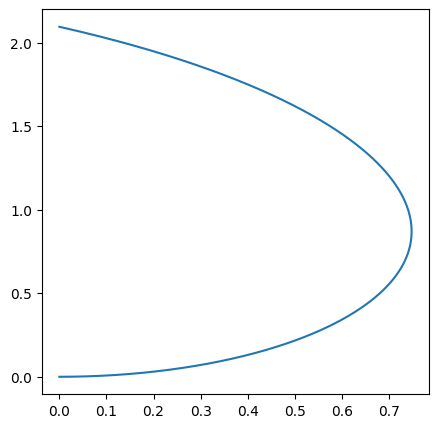

In [19]:
T=2*np.pi
t = np.arange(0,T,1e-2)

q1 = (t - np.sin(t))/4
v1 = 1/4 * (1 - np.cos(t))
a1 = 1/4 * np.sin(t)

q2 = (t - np.sin(t))/3
v2 = 1/3 * (1 - np.cos(t))
a2 = 1/3 * np.sin(t)

q3 = (t - np.sin(t))/3
v3 = 1/3 * (1 - np.cos(t))
a3 = 1/3 * np.sin(t)

r = np.array([q3*np.cos(q1),q3*np.sin(q1)])

fig,ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(r[0,:],r[1,:])

#ax.plot(t,a2)

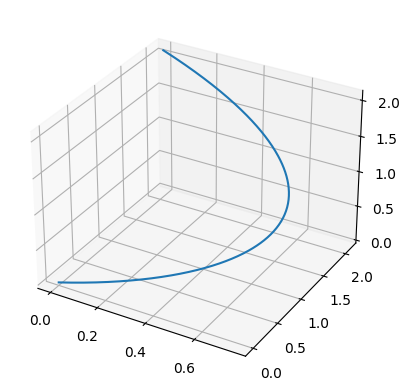

In [20]:
fig,ax = plt.subplots(subplot_kw = {"projection": "3d"})
ax.plot(r[0,:],r[1,:], q2)

# Moment i sile u aktuatorima
Izračun momenta i sila u aktuatorima napravljen je numeričkim putem te grafovi prikazuju raspodijelu momenta i sila u aktuatorima u ovisnosti o vremenu.

In [21]:
F1=f1_num(t, g, v1, v2, v3, a1, a2, a3, q1, q2, q3, m2, m3, I2, I3)
F1[5]

0.0041271860922500025

In [22]:
F2=f2_num(t, g, v1, v2, v3, a1, a2, a3, q1, q2, q3, m2, m3, I2, I3)
F2[5]

9.826659723090227

In [23]:
F3=f3_num(t, g, v1, v2, v3, a1, a2, a3, q1, q2, q3, m2, m3, I2, I3)
F3[5]

0.016659723088870506

Text(0.5, 1.0, 'Sila 3. aktuatora')

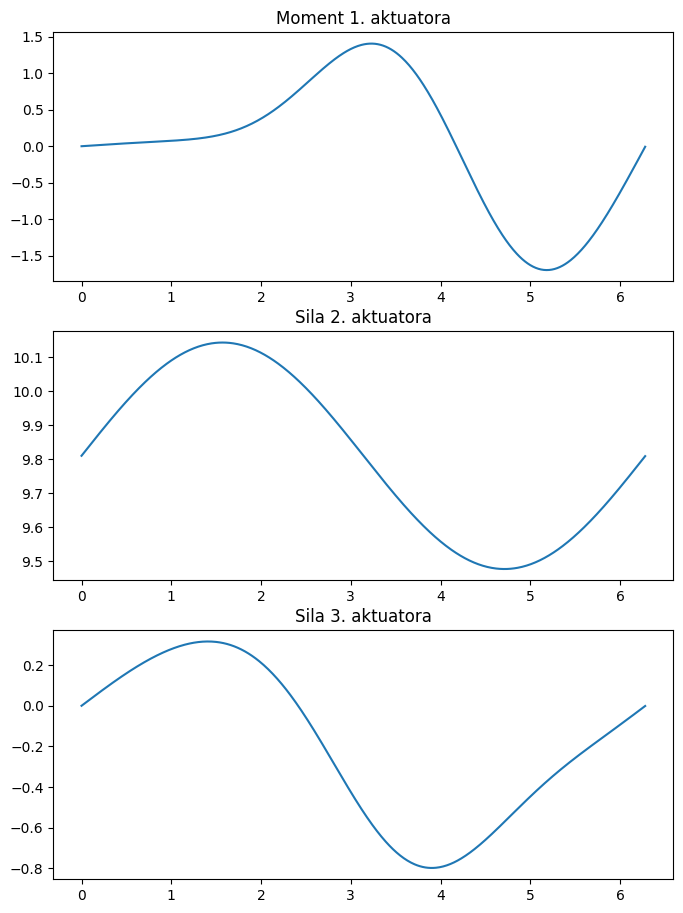

In [24]:
fig,ax = plt.subplots(3,1,figsize=(8,11))

ax[0].plot(t,F1)
ax[0].set_title(r"Moment 1. aktuatora")

ax[1].plot(t,F2)
ax[1].set_title(r"Sila 2. aktuatora")

ax[2].plot(t,F3)
ax[2].set_title(r"Sila 3. aktuatora")